In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_amazon_data.csv')
df.sample(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
145,B00RFWNJMC,Airtel DigitalTV DTH Remote SD/HD/HD Recording...,"Electronics|HomeTheater,TV&Video|Accessories|R...",₹195,₹499,61.0,3.7,1383,Compatible with SD and HD Recording,"AGD2H2SMDLQK62MH7BFWQ2INBP2A,AELIUKITTHS3MSGTS...","ABHAY SINGH,kapil,Amazon Customer,M.V.SUBBA RA...","R2RV2M8NMHN3R6,R39R9NAW42YGZ7,R1P3SC4CEA50V1,R...","Good product,Not bad,WORKING WITH Airtel DTH,G...","Value of money,Usually gd,Good Product,Good,Q...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OXYURA-Airtel-Digital-Re...


## Descriptive Statistics

In [3]:
df[['discount_percentage', 'rating_count', 'rating']].describe()

,discount_percentage,rating_count,rating
count,1463.000000,1463.000000,1462.000000
mean,47.650718,18295.541353,4.096717
std,21.622373,42753.864952,0.289497
min,0.000000,2.000000,2.000000
25%,32.000000,1186.000000,4.000000
50%,50.000000,5179.000000,4.100000
75%,63.000000,17336.500000,4.300000
max,94.000000,426973.000000,5.000000


Discount Percentages:

- The average discount for each product is 47.65% with the standard deviation being 21.62%.

- Discounts vary from 0% (no discount at all) to 94% (practically free).

- The median discount is 50 percent, meaning half of the products are discounted by 50 percent or more.

Rating Counts:

- Average rating division is: 18,295.54 Average, standard division, this is high (42,753.86), performance of the sales, significant deviation.

- The count for the median rating is well below the count for the mean (5,179 compared to ~10 million), which means there are still products with very high sales that despite being rated had huge influence on distribution.

- The number of ratings varies from 2 to 426,973, indicating a large difference in the popularity of products.

Ratings:

- Overall average score is 4.10 and STD is 0.29, so most of the products are highly rated.

- Ratings go from 2.00 to 5.00, with 75% of products rated 4.30 or above.

## Visualize the Relationship Between Discounts and Sales Performance

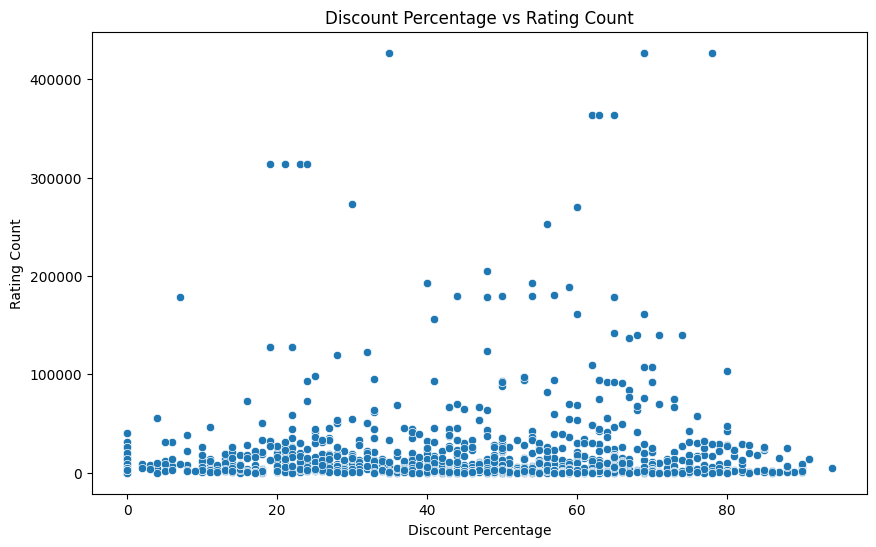

In [5]:
# Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating_count', data=df)
plt.title('Discount Percentage vs Rating Count')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating Count')
plt.show()

- There does not appear to be a direct linear relationship between discounting percentages and rating counts. So plot is showing that higher discounts aren't always leading higher sales (as proxied by rating counts)

- Even at low discount percentages (eg 0-30%) we can see a handful of products with very high rating counts (200,000+). These outliers indicate that, for these products, something else besides discounts (e.g., brand reputation, product quality or marketing) is generating sales.

- On the other hand, a few products seem to have high discounts (80-90%), and relatively low rating counts, which suggests that there might not be a direct correlation between high discounts and high sales.

- Most items, whether discounted or not, have fewer than 50,000 ratings. Which implies that, regardless of the discount offered, most products sell moderately well.

- This shows that there are many points in the [40,70%] discount range, suggesting that this is a common range for the products on the dataset.

- In the right top corner we are seeing some products with higher discounts and high ratings count but in general there is no strong correlation. And therefore discounts may not be the main driver of sales performance alone.

- The existence of outliers (high sales for low discounts and low sales for high discounts) indicates that factors like product quality, brand reputation, or marketing efforts might be highly influential in propelling sales.

## Correlation Analysis

In [6]:
correlation = df[['discount_percentage', 'rating_count']].corr()
print(correlation)

                     discount_percentage  rating_count
discount_percentage             1.000000      0.011691
rating_count                    0.011691      1.000000


In fact, the correlation coefficient of 0.011691 is showing that there is no significant linear relationship between the two variables discounts and sales performance. So this means, SIMPLE discounts are not a captain of the ship to sail you to the sales journey, other fact analysis need to be driven to bring the sales performance in sense.

Despite being a useful promotional tactic, the weak correlation in this dataset indicates the need to consider various factors when preparing to sell. This approach is in direct contrast to a discount-led strategy and therefore protects long-term profit while creating sustainable sales growth through product quality, exceptional customer service, and focused promotion.

## Group by Discount Ranges

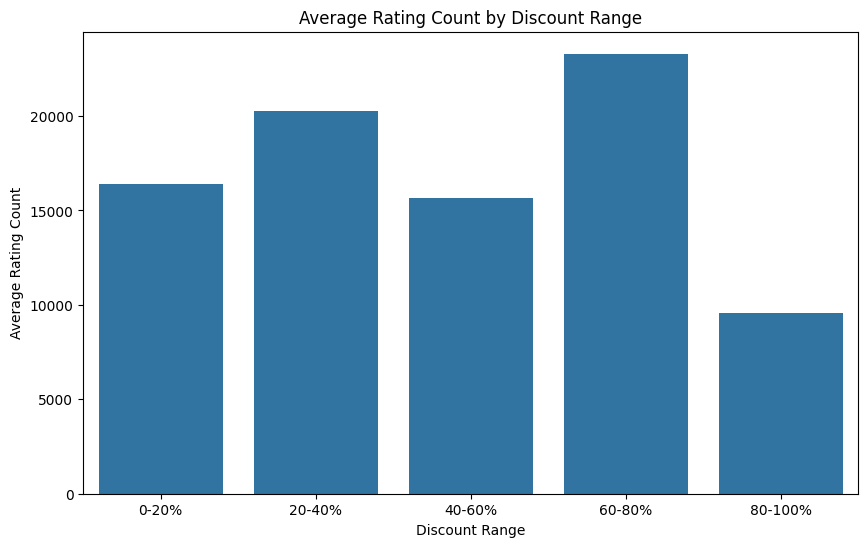

In [13]:
df['discount_range'] = pd.cut(df['discount_percentage'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
discount_sales = df.groupby('discount_range', observed=False)['rating_count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='discount_range', y='rating_count', data=discount_sales)
plt.title('Average Rating Count by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Rating Count')
plt.show()

The bar plot (Average Rating Count by Discount Range) illustrates how average sales performance (using rating counts as the proxy) differs across discount ranges. That means moderate to high discounts (40% - 60% off whatever you're buying) has the highest average rating count. On the other hand, the ranges 0-20% (low discounts) and 80-100% (very high discounts) are found with lower average rating counts, as small discounts are generally not attractive enough, while very high discounts may not yield proportionally higher sales possibly due to low perceived quality or ineffective advertising. The moderate performance between the 20-40% and 60-80% ranges shows they can still drive sales but are less effective than the 40-60% range.

According to this analysis discounts between 40% and 60% are the most efficient ones that generate sales while very big and very small discounts are less effective. In the wake of zero discount, businesses should show a balanced mix — with moderate to high discounts and must start minimizing deep discounts and influence marketing for zero-discount products. Moreover, it is advisable to conduct more detailed studies on aspects such as product quality, brand perception, and customer preferences to optimize discounting techniques and ensure long-term revenue growth.